### Разведочный анализ данных


Подключаем библиотеки.

In [25]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Загружаем данные.

In [26]:
x_bp_df = pd.read_excel('data/X_bp.xlsx', sheet_name='X_bp.csv', index_col=0)
x_nup_df = pd.read_excel('data/X_nup.xlsx', sheet_name='X_nup.csv', index_col=0)

In [27]:
x_bp_df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
0.0                       3000.000000               220.000000  
1.0                       3000.000000               220.000000  
2.0                       3000.000000               220.000000  
3.0                       3000.000000               220.000000  
4.0                       3000.000000               220.000000  
...                               ...                      ...  
1018.0                    2387.292495               125.007669  
1019.0                    2360.392784               117.730099  
1020.0                    2662.906040               236.606764  
1021.0                    2071.715856               197.126067  
1022.0                    2856.328932

In [28]:
x_nup_df

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                    0.0     4.000000          57.000000
1.0                    0.0     4.000000          60.000000
2.0                    0.0     4.000000          70.000000
3.0                    0.0     5.000000          47.000000
4.0                    0.0     5.000000          57.000000
...                    ...          ...                ...
1035.0                90.0     8.088111          47.759177
1036.0                90.0     7.619138          66.931932
1037.0                90.0     9.800926          72.858286
1038.0                90.0    10.079859          65.519479
1039.0                90.0     9.021043          66.920143

[1040 rows x 3 columns]

Объединяем датасеты типом объединения "inner"

In [29]:
df = x_bp_df.merge(x_nup_df, left_index=True, right_index=True, how='inner')

In [30]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                       3000.000000               220.000000   
1.0                       3000.000000               220.000000   
2.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

Проверим на наличие пропусков.

In [32]:
df.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Посмотрим описателную статистику.

In [33]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1023.000000       1023.000000   
mean                          2.930366       1975.734888   
std                           0.913222         73.729231   
min                           0.389403       1731.764635   
25%                           2.317887       1924.155467   
50%                           2.906878       1977.621657   
75%                           3.552660       2021.374375   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1023.000000                  1023.000000   
mean              739.923233                   110.570769   
std               330.231581                    28.295911   
min                 2.436909                    17.740275   
25%               500.047452                    92.443497   
50%               739.664328                   110.564840   
75%               961.812526                   129.730366   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1023.000000               1023.000000   
mean                         22.244390                285.882151   
std                           2.406301                 40.943260   
min                          14.254985                100.000000   
25%                          20.608034                259.066528   
50%                          22.230744                285.896812   
75%                          23.961934                313.002106   
max                          33.000000                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1023.000000                           1023.000000   
mean                      482.731833                             73.328571   
std                       281.314690                              3.118983   
min                         0.603740                             64.054061   
25%                       266.816645                             71.245018   
50%                       451.864365                             73.268805   
75%                       693.225017                             75.356612   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1023.000000              1023.000000   
mean                     2466.922843               218.423144   
std                       485.628006                59.735931   
min                      1036.856605                33.803026   
25%                      2135.850448               179.627520   
50%                      2459.524526               219.198882   
75%                      2767.193119               257.481724   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1023.000000  1023.000000        1023.000000  
mean            44.252199     6.899222          57.153929  
std             45.015793     2.563467          12.350969  
min              0.000000     0.000000           0.000000  
25%              0.000000     5.080033          49.799212  
50%              0.000000     6.916144          57.341920  
75%             90.000000     8.586293          64.944961  
max             90.000000    14.440522         103.988901

Посмотрим количество уникальных значений в каждом признаке.

In [34]:
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [35]:
df.head(20)

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                          1.857143            2030.0   
1.0                          1.857143            2030.0   
2.0                          1.857143            2030.0   
3.0                          1.857143            2030.0   
4.0                          2.771331            2030.0   
5.0                          2.767918            2000.0   
6.0                          2.569620            1910.0   
7.0                          2.561475            1900.0   
8.0                          3.557018            1930.0   
9.0                          3.532338            2100.0   
10.0                         2.919678            2160.0   
11.0                         2.877358            1990.0   
12.0                         1.598174            1950.0   
13.0                         2.919678            1980.0   
14.0                         4.029126            1910.0   
15.0                         2.934783            2030.0   
16.0                         3.557018            1880.0   
17.0                         4.193548            1950.0   
18.0                         4.897959            1890.0   
19.0                         3.532338            1980.0   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0              738.736842                        30.00   
1.0              738.736842                        50.00   
2.0              738.736842                        49.90   
3.0              738.736842                       129.00   
4.0              753.000000                       111.86   
5.0              748.000000                       111.86   
6.0              807.000000                       111.86   
7.0              535.000000                       111.86   
8.0              889.000000                       129.00   
9.0             1421.000000                       129.00   
10.0             933.000000                       129.00   
11.0            1628.000000                       129.00   
12.0             827.000000                       129.00   
13.0             568.000000                       129.00   
14.0             800.000000                       129.00   
15.0             302.000000                       129.00   
16.0             313.000000                       129.00   
17.0             506.000000                       129.00   
18.0             540.000000                       129.00   
19.0            1183.000000                       111.86   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                         22.267857                100.000000   
1.0                         23.750000                284.615385   
2.0                         33.000000                284.615385   
3.0                         21.250000                300.000000   
4.0                         22.267857                284.615385   
5.0                         22.267857                284.615385   
6.0                         22.267857                284.615385   
7.0                         22.267857                284.615385   
8.0                         21.250000                300.000000   
9.0                         21.250000                300.000000   
10.0                        21.250000                300.000000   
11.0                        21.250000                300.000000   
12.0                        21.250000                300.000000   
13.0                        21.250000                300.000000   
14.0                        21.250000                300.000000   
15.0                        21.250000                300.000000   
16.0                        21.250000                300.000000   
17.0                        21.250000                300.000000   
18.0                        21.250000                300.000000   
19.0                        22.267857                284.615385   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                 

В 19 строке признаки "Угол нашивки", "Шаг нашивки" и "Плотность нашивки" принимают нулевые значения, чего быть не может. Следовательно, эту строку можем считать за выброс.

In [36]:
df.drop([19], axis = 0, inplace=True)

In [37]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0.0                       3000.000000               220.000000   
1.0                       3000.000000               220.000000   
2.0                       3000.000000               220.000000   
3.0                       3000.000000               220.000000   
4.0                       3000.000000               220.000000   
...                               ...                      ...   
1018.0                    2387.292495               125.007669   
1019.0                    2360.392784               117.730099   
1020.0                    2662.906040               236.606764   
1021.0                    2071.715856               197.126067   
1022.0                    

In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df.head(20)

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                          1.857143            2030.0             738.736842   
1                          1.857143            2030.0             738.736842   
2                          1.857143            2030.0             738.736842   
3                          1.857143            2030.0             738.736842   
4                          2.771331            2030.0             753.000000   
5                          2.767918            2000.0             748.000000   
6                          2.569620            1910.0             807.000000   
7                          2.561475            1900.0             535.000000   
8                          3.557018            1930.0             889.000000   
9                          3.532338            2100.0            1421.000000   
10                         2.919678            2160.0             933.000000   
11                         2.877358            1990.0            1628.000000   
12                         1.598174            1950.0             827.000000   
13                         2.919678            1980.0             568.000000   
14                         4.029126            1910.0             800.000000   
15                         2.934783            2030.0             302.000000   
16                         3.557018            1880.0             313.000000   
17                         4.193548            1950.0             506.000000   
18                         4.897959            1890.0             540.000000   
19                         2.877358            2000.0             205.000000   

    Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                         30.00                        22.267857   
1                         50.00                        23.750000   
2                         49.90                        33.000000   
3                        129.00                        21.250000   
4                        111.86                        22.267857   
5                        111.86                        22.267857   
6                        111.86                        22.267857   
7                        111.86                        22.267857   
8                        129.00                        21.250000   
9                        129.00                        21.250000   
10                       129.00                        21.250000   
11                       129.00                        21.250000   
12                       129.00                        21.250000   
13                       129.00                        21.250000   
14                       129.00                        21.250000   
15                       129.00                        21.250000   
16                       129.00                        21.250000   
17                       129.00                        21.250000   
18                       129.00                        21.250000   
19                       111.86                        22.267857   

    Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                 100.000000                          210.0   
1                 284.615385                          210.0   
2                 284.615385                          210.0   
3                 300.000000                          210.0   
4                 284.615385                          210.0   
5                 284.615385                          210.0   
6                 284.615385                          210.0   
7                 284.615385                          380.0   
8                 300.000000                          380.0   
9                 300.000000                         1010.0   
10                300.000000                         1010.0   
11                300.000000                         1010.0   
12                300.000000                          470.0   
13          

Построим гистограммы распределения переменных, диаграммы размаха "ящик с усами" и попарные графики рассеяния точек.

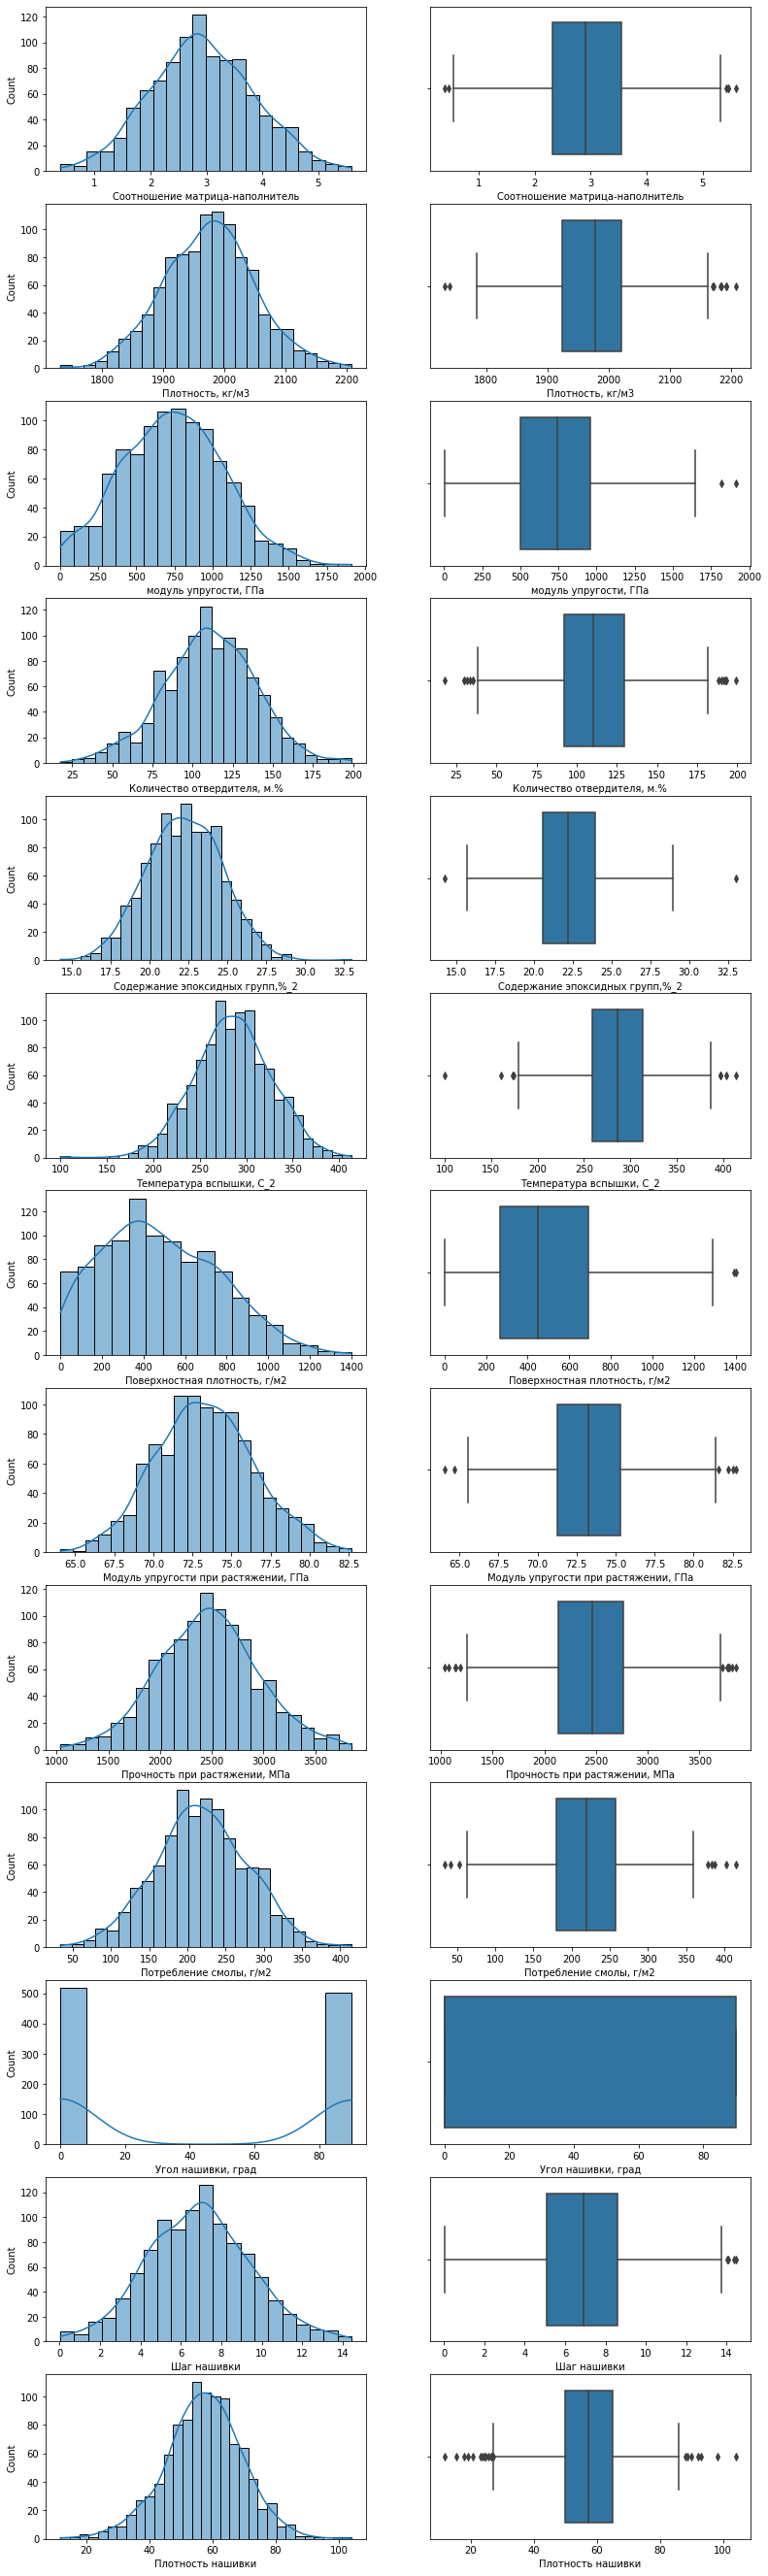

In [40]:
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df, x=column, ax=axes[k, 1])
plt.show()

Распределение данных близи к нормальному по признакам:

- Соотношение матрица-наполнитель

- Плотность, кг/м3

- модуль упругости, ГПа

- Количество отвердителя, м.%

- Содержание эпоксидных групп,%_2

- Температура вспышки, С_2

- Поверхностная плотность, г/м2

- Модуль упругости при растяжении, ГПа

- Прочность при растяжении, МПа

- Потребление смолы, г/м2

- Шаг нашивки

- Плотность нашивки

Дискретное распределение данных по признаку:

- Угол нашивки, град

Нарисуем тепловую карту, чтобы посмотреть коэффициент корреляции.

<AxesSubplot:>

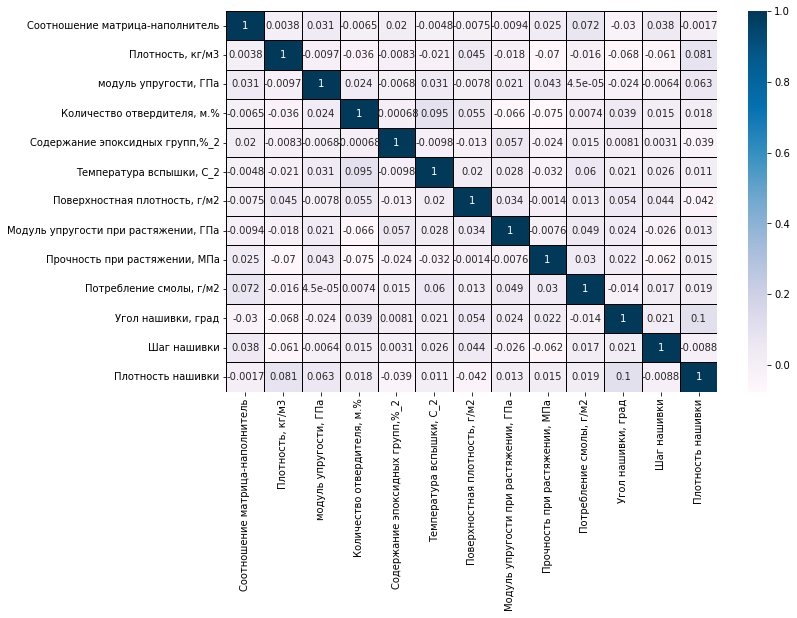

In [41]:
plt.figure(figsize = (11, 7))
sns.heatmap(df.corr(), cmap = "PuBu", annot = True, linewidths=1, linecolor='black')

Коэффициент корреляции данных близок к 0, что говорит об отсутствии линейной зависимости.

Нарисуем попарные графики рассеивания.

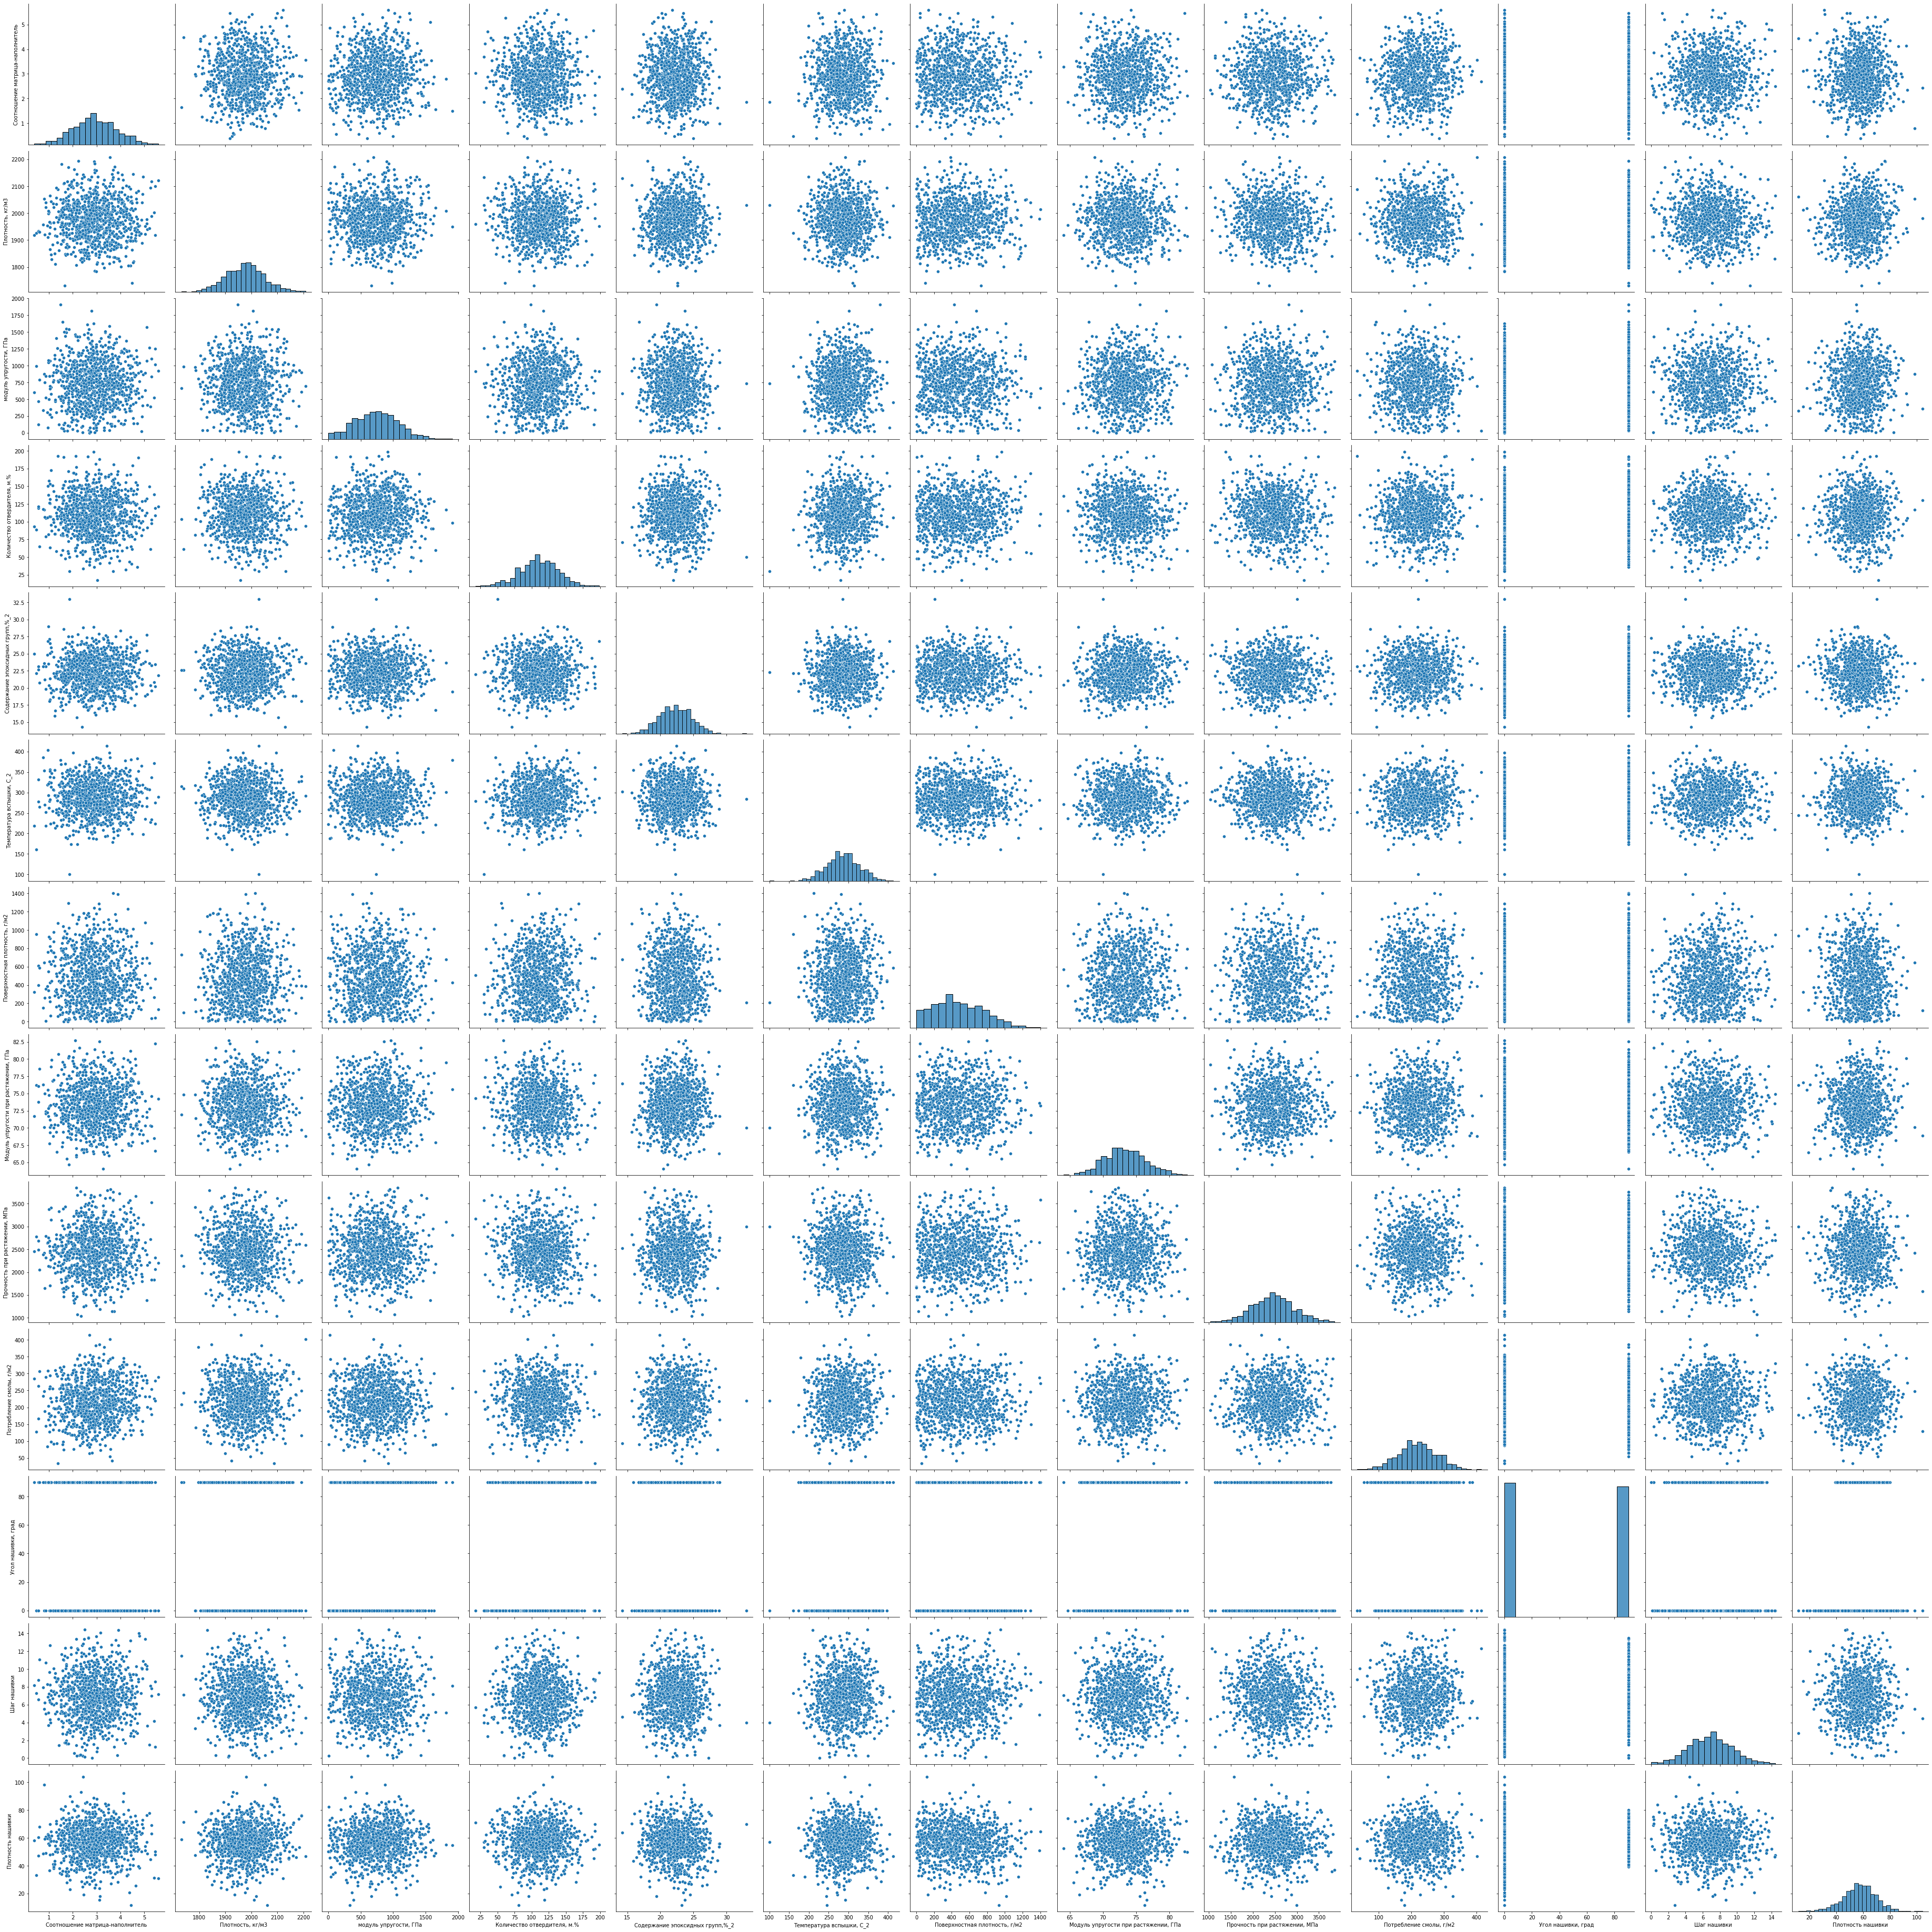

In [42]:
sns.pairplot(df, height=4)

### Предобработка данных


Так как угол нашивки принимает категориальное значение 0 и 90 градусов, закодируем его в 0 и 1 при помощи LabelEncoder.

In [43]:
le = preprocessing.LabelEncoder()
df['Угол нашивки, град'] = le.fit_transform(df['Угол нашивки, град'])
df

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                            1.857143       2030.000000   
1                            1.857143       2030.000000   
2                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
...                               ...               ...   
1017                         2.271346       1952.087902   
1018                         3.444022       2050.089171   
1019                         3.280604       1972.372865   
1020                         3.705351       2066.799773   
1021                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1                738.736842                    50.000000   
2                738.736842                    49.900000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
...                     ...                          ...   
1017             912.855545                    86.992183   
1018             444.732634                   145.981978   
1019             416.836524                   110.533477   
1020             741.475517                   141.397963   
1021             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                           22.267857                100.000000   
1                           23.750000                284.615385   
2                           33.000000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
...                               ...                       ...   
1017                        20.123249                324.774576   
1018                        19.599769                254.215401   
1019                        23.957502                248.423047   
1020                        19.246945                275.779840   
1021                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0                        210.000000                             70.000000   
1                        210.000000                             70.000000   
2                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
...                             ...                                   ...   
1017                     209.198700                             73.090961   
1018                     350.660830                             72.920827   
1019                     740.142791                             74.734344   
1020                     641.468152                             74.042708   
1021                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
0                       3000.000000               220.000000   
1                       3000.000000               220.000000   
2                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
...                             ...                      ...   
1017                    2387.292495               125.007669   
1018                    2360.392784               117.730099   
1019                    2662.906040               236.606764   
1020                    2071.715856               197.126067   
1021                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                 

Исключим выбросы при помощи алгоритма Isolation Forest или метода межквартильных расстояний.

Посмотрим, как будет работать на этих данных Isolation Forest.

In [44]:
df_clean1 = df.copy(deep=True)

In [45]:
to_model_columns = df_clean1.columns[:13]
from sklearn.ensemble import IsolationForest
isf = IsolationForest(n_estimators=100, max_samples='auto', \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
preds = isf.fit_predict(df_clean1[to_model_columns])

df_clean1['iso_forest_outliers'] = preds
outliers = df_clean1.loc[df_clean1['iso_forest_outliers']==-1]
outlier_index = list(outliers.index)

print(df_clean1["iso_forest_outliers"].value_counts())

 1    928
-1     94
Name: iso_forest_outliers, dtype: int64


По всем переменным выбросов получилось 94.

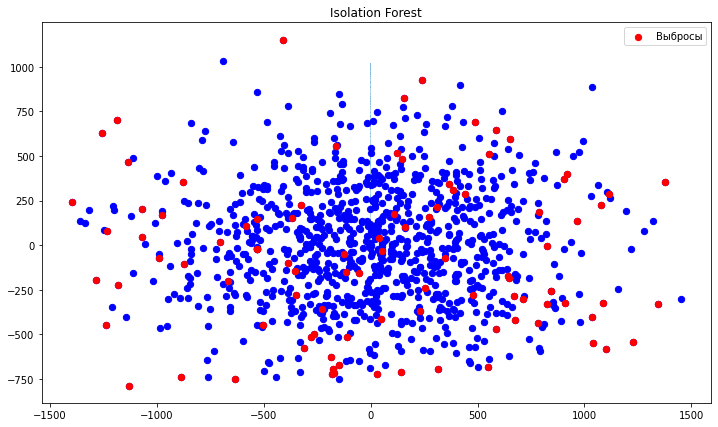

In [46]:
#Визуализация результата
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df_clean1[to_model_columns])

res=pd.DataFrame(pca.transform(df_clean1[to_model_columns]))

Z = np.array(res)
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.title("Isolation Forest")
plt.contourf( Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(res[0], res[1], c='blue',
                 s=40,label="")

b1 = plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='red',
                 s=40,  edgecolor="red",label="Выбросы")
plt.legend(loc="upper right")
plt.show()

Результат меня не устроил, т.к. по графику видно, что некоторые точки по-прежнему находятся далеко от общего облака.

Рассмотрим метод межквартильных расстояний.

In [47]:
df_clean = df.copy(deep=True)

In [48]:
for d in df_clean:
    q75,q25 = np.percentile(df_clean.loc[:,d], [75,25])
    count_qr = q75-q25
    
    max = q75+(1.5*count_qr)
    min = q25-(1.5*count_qr)
    
    df_clean.loc[df_clean[d] < min,d] = np.nan
    df_clean.loc[df_clean[d] > max,d] = np.nan
df_clean.head() 

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                          NaN                        22.267857   
1                        50.00                        23.750000   
2                        49.90                              NaN   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                       NaN                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                 0.0          4.0               57.0  
1                    220.0                 0.0          4.0               60.0  
2                    220.0                 0.0          4.0               70.0  
3                    220.0                 0.0          5.0               47.0  
4                    220.0                 0.0          5.0               57.0

In [49]:
df_clean.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       20
dtype: int64

Количество выбросов получилось незначительное, решаем их удалить.

In [50]:
df_clean = df_clean.dropna(axis = 0)
df_clean

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            1.857143       2030.000000   
3                            1.857143       2030.000000   
4                            2.771331       2030.000000   
5                            2.767918       2000.000000   
6                            2.569620       1910.000000   
...                               ...               ...   
1017                         2.271346       1952.087902   
1018                         3.444022       2050.089171   
1019                         3.280604       1972.372865   
1020                         3.705351       2066.799773   
1021                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                738.736842                    50.000000   
3                738.736842                   129.000000   
4                753.000000                   111.860000   
5                748.000000                   111.860000   
6                807.000000                   111.860000   
...                     ...                          ...   
1017             912.855545                    86.992183   
1018             444.732634                   145.981978   
1019             416.836524                   110.533477   
1020             741.475517                   141.397963   
1021             417.316232                   129.183416   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                           23.750000                284.615385   
3                           21.250000                300.000000   
4                           22.267857                284.615385   
5                           22.267857                284.615385   
6                           22.267857                284.615385   
...                               ...                       ...   
1017                        20.123249                324.774576   
1018                        19.599769                254.215401   
1019                        23.957502                248.423047   
1020                        19.246945                275.779840   
1021                        27.474763                300.952708   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                        210.000000                             70.000000   
3                        210.000000                             70.000000   
4                        210.000000                             70.000000   
5                        210.000000                             70.000000   
6                        210.000000                             70.000000   
...                             ...                                   ...   
1017                     209.198700                             73.090961   
1018                     350.660830                             72.920827   
1019                     740.142791                             74.734344   
1020                     641.468152                             74.042708   
1021                     758.747882                             74.309704   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                       3000.000000               220.000000   
3                       3000.000000               220.000000   
4                       3000.000000               220.000000   
5                       3000.000000               220.000000   
6                       3000.000000               220.000000   
...                             ...                      ...   
1017                    2387.292495               125.007669   
1018                    2360.392784               117.730099   
1019                    2662.906040               236.606764   
1020                    2071.715856               197.126067   
1021                    2856.328932               194.754342   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

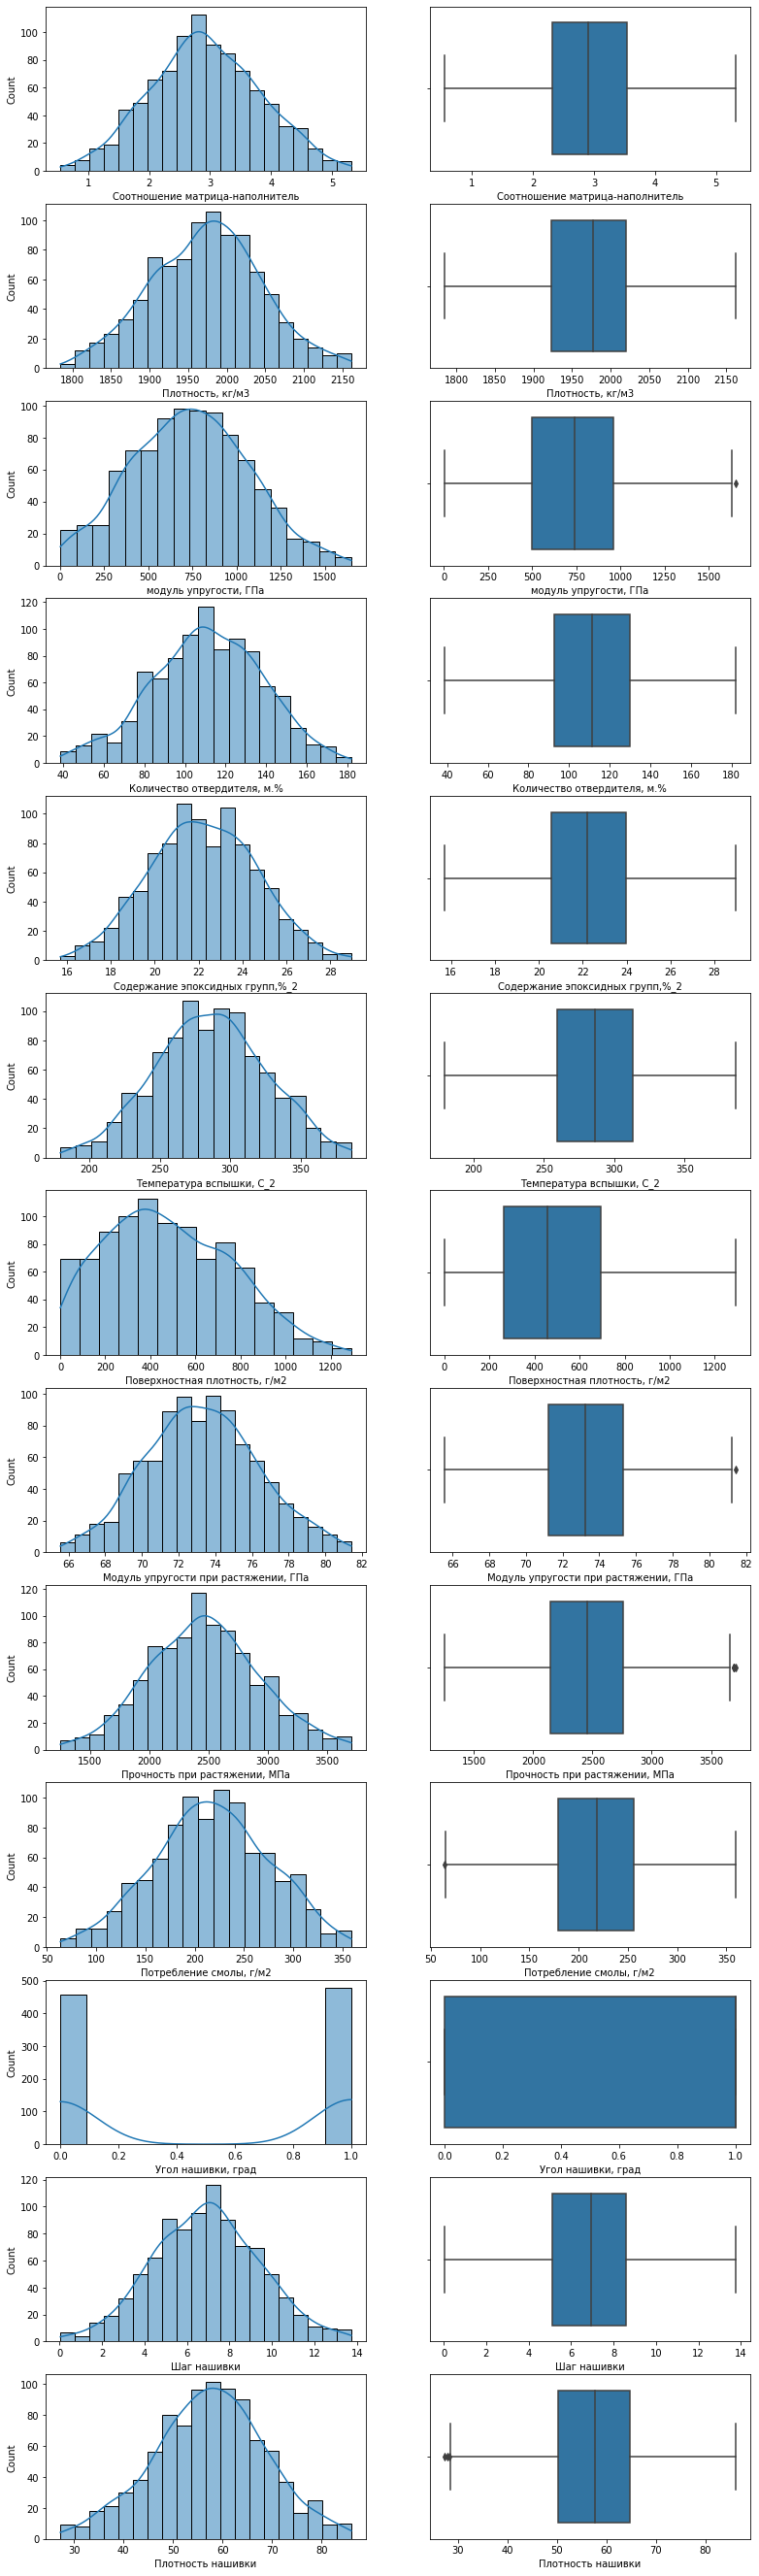

In [51]:
#Визуализируем результат
fig, axes = plt.subplots(13, 2, figsize=(13, 48))
for k, column in enumerate(df.columns):    
    sns.histplot(data=df_clean, x=column, kde=True, ax=axes[k, 0])
    sns.boxplot(data=df_clean, x=column, ax=axes[k, 1])
plt.show()

In [52]:
#Описательная статистика очищенных данных
df_clean.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          2.925683       1974.040023   
std                           0.893712         70.808120   
min                           0.547391       1784.482245   
25%                           2.321931       1923.443748   
50%                           2.904731       1977.258043   
75%                           3.546650       2020.158764   
max                           5.314144       2161.565216   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean              738.247627                   110.916216   
std               328.708665                    27.037891   
min                 2.436909                    38.668500   
25%               498.577158                    92.523816   
50%               738.736842                   111.113175   
75%               958.418993                   130.001450   
max              1649.415706                   181.828448   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                         22.209030                286.040414   
std                           2.394871                 39.400677   
min                          15.695894                179.374391   
25%                          20.571516                259.184486   
50%                          22.184713                286.024118   
75%                          23.961818                312.991425   
max                          28.955094                386.067992   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                      482.993901                             73.305127   
std                       280.190377                              3.037381   
min                         0.603740                             65.553336   
25%                       266.004099                             71.248823   
50%                       457.732246                             73.259230   
75%                       695.900862                             75.310788   
max                      1291.340115                             81.417126   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                     2467.488822               217.613374   
std                       463.838911                57.827255   
min                      1250.392802                63.685698   
25%                      2146.936034               179.489091   
50%                      2457.959767               218.388715   
75%                      2755.169485               256.396777   
max                      3705.672523               359.052220   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean             0.511752     6.915585          57.451895  
std              0.500129     2.509672          11.239331  
min              0.000000     0.037639          27.272928  
25%              0.000000     5.134988          50.209656  
50%              1.000000     6.943337          57.584225  
75%              1.000000     8.591450          64.798211  
max              1.000000    13.732404          86.012427

Категориальный признак угол нашивки для удобства мы преобразовали ранее. Теперь необходимо провести стандартизацию данных, использую для этого MinMaxScaler.

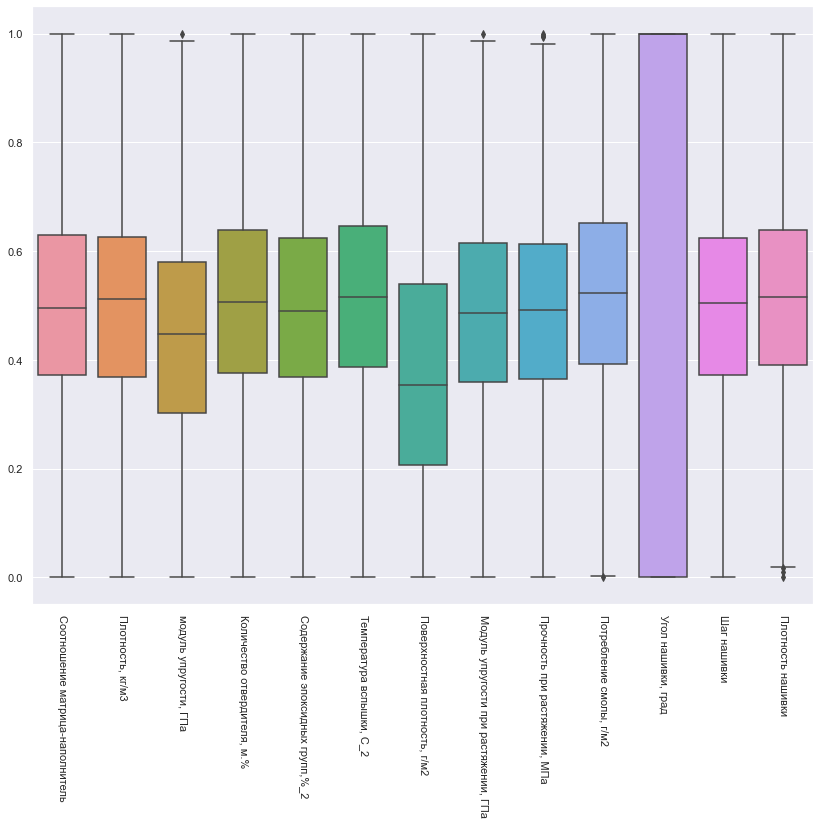

In [53]:
min_max_scaler = preprocessing.MinMaxScaler()
dfc_norm = pd.DataFrame(min_max_scaler.fit_transform(df_clean),
    columns = df_clean.columns,
    index = df_clean.index)
sns.set(rc={'figure.figsize':(14,11)})
ax = sns.boxplot(data=dfc_norm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=-90);

In [54]:
dfc_norm.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       936.000000        936.000000   
mean                          0.498933          0.502695   
std                           0.187489          0.187779   
min                           0.000000          0.000000   
25%                           0.372274          0.368517   
50%                           0.494538          0.511229   
75%                           0.629204          0.624999   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             936.000000                   936.000000   
mean                0.446764                     0.504664   
std                 0.199583                     0.188865   
min                 0.000000                     0.000000   
25%                 0.301243                     0.376190   
50%                 0.447061                     0.506040   
75%                 0.580446                     0.637978   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       936.000000                936.000000   
mean                          0.491216                  0.516059   
std                           0.180620                  0.190624   
min                           0.000000                  0.000000   
25%                           0.367716                  0.386128   
50%                           0.489382                  0.515980   
75%                           0.623410                  0.646450   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     936.000000                            936.000000   
mean                        0.373733                              0.488647   
std                         0.217078                              0.191466   
min                         0.000000                              0.000000   
25%                         0.205619                              0.359024   
50%                         0.354161                              0.485754   
75%                         0.538683                              0.615077   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     936.000000               936.000000   
mean                        0.495706                 0.521141   
std                         0.188915                 0.195781   
min                         0.000000                 0.000000   
25%                         0.365149                 0.392067   
50%                         0.491825                 0.523766   
75%                         0.612874                 0.652447   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          936.000000   936.000000         936.000000  
mean             0.511752     0.502232           0.513776  
std              0.500129     0.183258           0.191342  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.372211           0.390482  
50%              1.000000     0.504258           0.516029  
75%              1.000000     0.624604           0.638842  
max              1.000000     1.000000           1.000000

<AxesSubplot:>

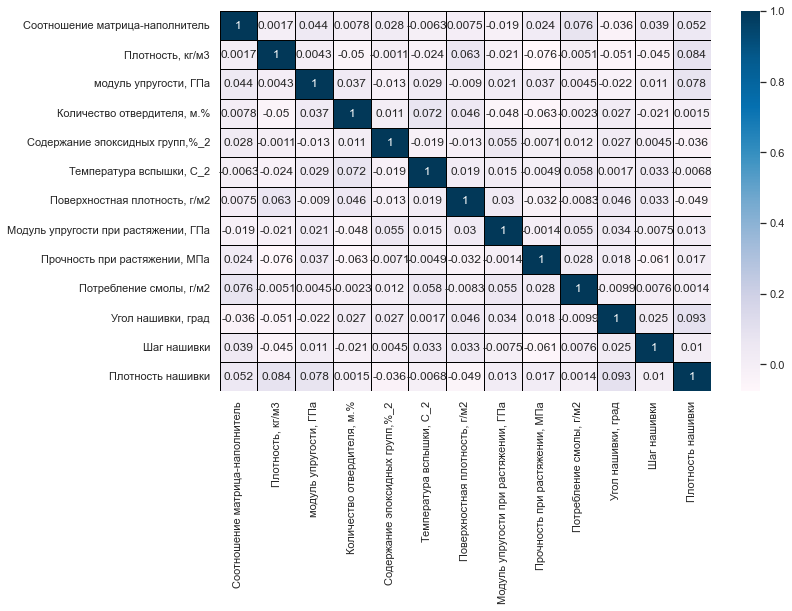

In [55]:
plt.figure(figsize = (11, 7))
sns.heatmap(dfc_norm.corr(), cmap = "PuBu", annot = True, linewidths=1, linecolor='black')

Корреляции между признаками не наблюдается.

## Построение моделей.

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

###  Модели для модуля упругости при растяжении и прочности при растяжении

In [57]:
#Разбиваем на тестовую и обучающие выборки
x_upr = dfc_norm.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_pr = dfc_norm.drop(['Прочность при растяжении, МПа'], axis=1)
y_upr = dfc_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = dfc_norm[['Прочность при растяжении, МПа']]

X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x_upr, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x_pr, y_pr, test_size=0.3, random_state=1)

In [58]:
models = pd.DataFrame()

Рассмотрим линейную регрессию.

In [59]:
lin_r = LinearRegression()
lin_r_params = {
    'fit_intercept' : ['True', 'False']
}
gscv_lin_r_upr = GridSearchCV(lin_r, lin_r_params, n_jobs=-1, cv=10)
gscv_lin_r_upr.fit(X_train_upr, y_train_upr)
gscv_lin_r_upr.best_params_

{'fit_intercept': 'True'}

In [60]:
lin_r_upr = gscv_lin_r_upr.best_estimator_
print(f'R2-score LinearRegression для модуля упругости при растяжении: {lin_r_upr.score(X_test_upr, y_test_upr).round(4)}')

R2-score LinearRegression для модуля упругости при растяжении: -0.0213


In [61]:
lin_r_upr_result = pd.DataFrame({
   'Model': 'LinearRegression_upr',
   'MAE': mean_absolute_error(y_test_upr, lin_r_upr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_upr, lin_r_upr.predict(X_test_upr))).round(4)), 
   'R2 score': lin_r_upr.score(X_test_upr, y_test_upr).round(4),
    'max_error': max_error(y_test_upr, lin_r_upr.predict(X_test_upr).round(4))
}, index=['Модуль упругости при растяжении'])

In [62]:
models = models.append(lin_r_upr_result)
models

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\2077171500.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(lin_r_upr_result)


Model       MAE    rmse  \
Модуль упругости при растяжении  LinearRegression_upr  0.160519  0.1949   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539

In [63]:
gscv_lin_r_pr = GridSearchCV(lin_r, lin_r_params, n_jobs=-1, cv=10)
gscv_lin_r_pr.fit(X_train_pr, y_train_pr)
gscv_lin_r_pr.best_params_

{'fit_intercept': 'True'}

In [64]:
lin_r_pr = gscv_lin_r_pr.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lin_r_pr.score(X_test_pr, y_test_pr).round(4)}')

R2-score LR для прочности при растяжении: -0.0205


In [65]:
lin_r_pr_result = pd.DataFrame({
   'Model': 'LinearRegression_pr',
   'MAE': mean_absolute_error(y_test_pr, lin_r_pr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_pr, lin_r_pr.predict(X_test_pr))).round(4)), 
   'R2 score': lin_r_pr.score(X_test_pr, y_test_pr).round(4),
   'max_error': max_error(y_test_pr, lin_r_pr.predict(X_test_pr).round(4))
}, index=['Прочность при растяжении'])

C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Прочность при растяжении, МПа
Feature names seen at fit time, yet now missing:
- Модуль упругости при растяжении, ГПа

  warnings.warn(message, FutureWarning)


In [66]:
models = models.append(lin_r_pr_result)
models

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\238269672.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(lin_r_pr_result)


Model       MAE    rmse  \
Модуль упругости при растяжении  LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении          LinearRegression_pr  0.154218  0.1872   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600

Рассмотрим случайный лес. 

In [67]:
rf = RandomForestRegressor()
rf_params = {
    'n_estimators' : range(10, 1000, 10),
    'criterion' : ['squared_error', 'mean_squared_error', 'max_error'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'min_samples_leaf' : range(2, 10),
    'bootstrap' : ['True', 'False']
}
rscv_rf_upr = RandomizedSearchCV(rf, rf_params, n_jobs=-1, cv=10, verbose=5)
rscv_rf_upr.fit(X_train_upr, y_train_upr)
rscv_rf_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users

{'n_estimators': 260,
 'min_samples_split': 35,
 'min_samples_leaf': 7,
 'max_depth': 3,
 'criterion': 'squared_error',
 'bootstrap': 'False'}

In [68]:
rf_upr = rscv_rf_upr.best_estimator_
print(f'R2-score RFR для модуля упругости при растяжении: {rf_upr.score(X_test_upr, y_test_upr).round(4)}')

R2-score RFR для модуля упругости при растяжении: -0.0246


In [69]:
rf_upr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_upr',
   'MAE': mean_absolute_error(y_test_upr, rf_upr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_upr, rf_upr.predict(X_test_upr))).round(4)), 
   'R2 score': rf_upr.score(X_test_upr, y_test_upr).round(4),
   'max_error': max_error(y_test_upr, rf_upr.predict(X_test_upr).round(4))
}, index=['Модуль упругости при растяжении'])

In [70]:
models = models.append(rf_upr_result)
models

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\813436810.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(rf_upr_result)


Model       MAE    rmse  \
Модуль упругости при растяжении       LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении               LinearRegression_pr  0.154218  0.1872   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160533  0.1952   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600  
Модуль упругости при растяжении   -0.0246   0.518039

In [71]:
rscv_rf_pr = RandomizedSearchCV(rf, rf_params, n_jobs=-1, cv=10, verbose=5)
rscv_rf_pr.fit(X_train_pr, y_train_pr)
rscv_rf_pr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users

{'n_estimators': 680,
 'min_samples_split': 35,
 'min_samples_leaf': 9,
 'max_depth': 2,
 'criterion': 'squared_error',
 'bootstrap': 'True'}

In [72]:
rf_pr = rscv_rf_pr.best_estimator_
print(f'R2-score RFR для прочности при растяжении: {rf_pr.score(X_test_pr, y_test_pr).round(4)}')

R2-score RFR для прочности при растяжении: -0.0112


In [73]:
rf_pr_result = pd.DataFrame({
   'Model': 'RandomForestRegressor_pr',
   'MAE': mean_absolute_error(y_test_pr, rf_pr.predict(X_test_pr)),
   'rmse': (np.sqrt(mean_squared_error(y_test_pr, rf_pr.predict(X_test_pr))).round(4)), 
   'R2 score': rf_pr.score(X_test_pr, y_test_pr).round(4),
    'max_error': max_error(y_test_pr, rf_pr.predict(X_test_pr).round(4))
}, index=['Прочность при растяжении'])

In [74]:
models = models.append(rf_pr_result)
models

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\3219660716.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(rf_pr_result)


Model       MAE    rmse  \
Модуль упругости при растяжении       LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении               LinearRegression_pr  0.154218  0.1872   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160533  0.1952   
Прочность при растяжении          RandomForestRegressor_pr  0.150363  0.1863   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600  
Модуль упругости при растяжении   -0.0246   0.518039  
Прочность при растяжении          -0.0112   0.527400

Рассмотрим метод К-ближайших соседей

In [75]:
kn = KNeighborsRegressor()
kn_params = {'n_neighbors' : range(1, 351, 2), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
gscv_kn_upr = GridSearchCV(kn, kn_params, n_jobs=-1, cv=10)
gscv_kn_upr.fit(X_train_upr, y_train_upr)
gscv_kn_upr.best_params_

{'algorithm': 'auto', 'n_neighbors': 59, 'weights': 'uniform'}

In [76]:
kn_upr = gscv_kn_upr.best_estimator_
print(f'R2-score KNeighborsRegressor для модуля упругости при растяжении: {kn_upr.score(X_test_upr, y_test_upr).round(4)}')

R2-score KNeighborsRegressor для модуля упругости при растяжении: -0.0046


In [77]:
kn_upr_result = pd.DataFrame({'Model': 'KNeighborsRegressor_upr',
   'MAE': mean_absolute_error(y_test_upr, kn_upr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_upr, kn_upr.predict(X_test_upr))).round(4)), 
   'R2 score': kn_upr.score(X_test_upr, y_test_upr).round(4),
    'max_error': max_error(y_test_upr, kn_upr.predict(X_test_upr).round(4))},
index=['Модуль упругости при растяжении'])

In [78]:
models = models.append(kn_upr_result)

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\318103714.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(kn_upr_result)


In [79]:
models

Model       MAE    rmse  \
Модуль упругости при растяжении       LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении               LinearRegression_pr  0.154218  0.1872   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160533  0.1952   
Прочность при растяжении          RandomForestRegressor_pr  0.150363  0.1863   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653  0.1933   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600  
Модуль упругости при растяжении   -0.0246   0.518039  
Прочность при растяжении          -0.0112   0.527400  
Модуль упругости при растяжении   -0.0046   0.474639

In [80]:
gscv_kn_pr = GridSearchCV(kn, kn_params, n_jobs=-1, cv=10)
gscv_kn_pr.fit(X_train_pr, y_train_pr)
gscv_kn_pr.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 349, 'weights': 'distance'}

In [81]:
kn_pr = gscv_kn_pr.best_estimator_
print(f'R2-score KNeighborsRegressor для прочности при растяжении: {kn_pr.score(X_test_pr, y_test_pr).round(4)}')

R2-score KNeighborsRegressor для прочности при растяжении: -0.0124


In [82]:
kn_pr_result = pd.DataFrame({'Model': 'KNeighborsRegressor_pr',
   'MAE': mean_absolute_error(y_test_pr, kn_pr.predict(X_test_pr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_pr, kn_pr.predict(X_test_pr))).round(4)), 
   'R2 score': kn_pr.score(X_test_pr, y_test_pr).round(4),
    'max_error': max_error(y_test_pr, kn_pr.predict(X_test_pr).round(4))},
index=['Прочность при растяжении'])

In [83]:
models = models.append(kn_pr_result)

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\87539314.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(kn_pr_result)


In [84]:
models

Model       MAE    rmse  \
Модуль упругости при растяжении       LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении               LinearRegression_pr  0.154218  0.1872   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160533  0.1952   
Прочность при растяжении          RandomForestRegressor_pr  0.150363  0.1863   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653  0.1933   
Прочность при растяжении            KNeighborsRegressor_pr  0.150033  0.1865   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600  
Модуль упругости при растяжении   -0.0246   0.518039  
Прочность при растяжении          -0.0112   0.527400  
Модуль упругости при растяжении   -0.0046   0.474639  
Прочность при растяжении          -0.0124   0.510100

Рассмотрим метод Деревья решений.

In [85]:
dtr = DecisionTreeRegressor()
dtr_params = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : range(1, 7),
    'min_samples_split' : range(20, 50, 5),
    'max_leaf_nodes' : range(1, 5),
    'min_samples_leaf' : range(2, 10),
    'max_features' : ['auto', 'sqrt', 'log2']
}
rscv_dtr_upr = RandomizedSearchCV(dtr, dtr_params, n_jobs=-1, cv=10, verbose=5)
rscv_dtr_upr.fit(X_train_upr, y_train_upr)
rscv_dtr_upr.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 must be either

{'splitter': 'best',
 'min_samples_split': 30,
 'min_samples_leaf': 8,
 'max_leaf_nodes': 2,
 'max_features': 'log2',
 'max_depth': 4,
 'criterion': 'squared_error'}

In [86]:
dtr_upr = rscv_dtr_upr.best_estimator_
print(f'R2-score DecisionTreeRegressor для модуля упругости при растяжении: {dtr_upr.score(X_test_upr, y_test_upr).round(4)}')
print(mean_absolute_error(y_test_upr, dtr_upr.predict(X_test_upr)))

R2-score DecisionTreeRegressor для модуля упругости при растяжении: -0.0193
0.1606788986374986


In [87]:
dtr_upr_result = pd.DataFrame({'Model': 'DecisionTreeRegressor_upr',
   'MAE': mean_absolute_error(y_test_upr, dtr_upr.predict(X_test_upr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_upr, dtr_upr.predict(X_test_upr))).round(4)), 
   'R2 score': dtr_upr.score(X_test_upr, y_test_upr).round(4),
    'max_error': max_error(y_test_upr, dtr_upr.predict(X_test_upr).round(4))},
index=['Модуль упругости при растяжении'])

In [88]:
models = models.append(dtr_upr_result)

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\1835303258.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(dtr_upr_result)


In [89]:
models

Model       MAE    rmse  \
Модуль упругости при растяжении       LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении               LinearRegression_pr  0.154218  0.1872   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160533  0.1952   
Прочность при растяжении          RandomForestRegressor_pr  0.150363  0.1863   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653  0.1933   
Прочность при растяжении            KNeighborsRegressor_pr  0.150033  0.1865   
Модуль упругости при растяжении  DecisionTreeRegressor_upr  0.160682  0.1947   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600  
Модуль упругости при растяжении   -0.0246   0.518039  
Прочность при растяжении          -0.0112   0.527400  
Модуль упругости при растяжении   -0.0046   0.474639  
Прочность при растяжении          -0.0124   0.510100  
Модуль упругости при растяжении   -0.0193   0.493139

In [90]:
gscv_dtr_pr = GridSearchCV(dtr, dtr_params, n_jobs=-1, cv=10, verbose=5)
gscv_dtr_pr.fit(X_train_pr, y_train_pr)
gscv_dtr_pr.best_params_

Fitting 10 folds for each of 27648 candidates, totalling 276480 fits


C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
69120 fits failed out of a total of 276480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\ostro\anaconda3\envs\vkr\lib\site-packages\sklearn\tree\_classes.py", line 314, in fit
    raise ValueError(
ValueError: max_leaf_nodes 1 must 

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 45,
 'splitter': 'random'}

In [91]:
dtr_pr = gscv_dtr_pr.best_estimator_
print(f'R2-score DecisionTreeRegressor для модуля прочности при растяжении: {dtr_pr.score(X_test_pr, y_test_pr).round(4)}')
print(mean_absolute_error(y_test_pr, dtr_pr.predict(X_test_pr)))

R2-score DecisionTreeRegressor для модуля прочности при растяжении: -0.0221
0.15097671299040066


In [92]:
dtr_pr_result = pd.DataFrame({'Model': 'DecisionTreeRegressor_pr',
   'MAE': mean_absolute_error(y_test_pr, dtr_pr.predict(X_test_pr).round(4)),
   'rmse': (np.sqrt(mean_squared_error(y_test_pr, dtr_pr.predict(X_test_pr))).round(4)), 
   'R2 score': dtr_pr.score(X_test_pr, y_test_pr).round(4),
    'max_error': max_error(y_test_pr, dtr_pr.predict(X_test_pr).round(4))},
index=['Прочность при растяжении'])

In [93]:
models = models.append(dtr_pr_result)

C:\Users\ostro\AppData\Local\Temp\ipykernel_2528\3805914980.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  models = models.append(dtr_pr_result)


In [94]:
models

Model       MAE    rmse  \
Модуль упругости при растяжении       LinearRegression_upr  0.160519  0.1949   
Прочность при растяжении               LinearRegression_pr  0.154218  0.1872   
Модуль упругости при растяжении  RandomForestRegressor_upr  0.160533  0.1952   
Прочность при растяжении          RandomForestRegressor_pr  0.150363  0.1863   
Модуль упругости при растяжении    KNeighborsRegressor_upr  0.160653  0.1933   
Прочность при растяжении            KNeighborsRegressor_pr  0.150033  0.1865   
Модуль упругости при растяжении  DecisionTreeRegressor_upr  0.160682  0.1947   
Прочность при растяжении          DecisionTreeRegressor_pr  0.150977  0.1873   

                                 R2 score  max_error  
Модуль упругости при растяжении   -0.0213   0.492539  
Прочность при растяжении          -0.0205   0.571600  
Модуль упругости при растяжении   -0.0246   0.518039  
Прочность при растяжении          -0.0112   0.527400  
Модуль упругости при растяжении   -0.0046   0.474639  
Прочность при растяжении          -0.0124   0.510100  
Модуль упругости при растяжении   -0.0193   0.493139  
Прочность при растяжении          -0.0221   0.497100

Модели работают одинаково плохо, даже с подбором параметров. Лучше всего работает метод "Случайный лес" для признака "Прочность при растяжении" и метод "Деревья решений" для "Модуля упругости при растяжении". Хуже всего проявил себя метод "Линейная регрессия".

### Модель для соотношения матрица-наполнитель

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [34]:
df_clean.shape

(936, 13)

In [35]:
x_mn = df_clean.drop(['Соотношение матрица-наполнитель'], axis=1)
y_mn = df_clean[['Соотношение матрица-наполнитель']]

X_train_mn, X_test_mn, y_train_mn, y_test_mn = train_test_split(x_mn, y_mn, test_size=0.3, random_state=1)
print('X_train_mn:', X_train_mn.shape, 'y_train_mn:', y_train_mn.shape)
print('X_test_mn:', X_test_mn.shape, 'y_test_mn:', y_test_mn.shape)

X_train_mn: (655, 12) y_train_mn: (655, 1)
X_test_mn: (281, 12) y_test_mn: (281, 1)


In [36]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [37]:
X_train_mn_norm = normalizer.adapt(np.array(X_train_mn))

In [38]:
model_mn = keras.Sequential( X_train_mn_norm)

model_mn.add(BatchNormalization())
model_mn.add(Dense(128, activation='relu')),
model_mn.add(Dense(128, activation='relu')),
model_mn.add(Dense(64, activation='relu')),
model_mn.add(Dropout(0.25)),
model_mn.add(Dense(64, activation='relu')),
model_mn.add(Dense(64, activation='relu')),
model_mn.add(Dropout(0.25)),
model_mn.add(Dropout(0.25)),
model_mn.add(Dense(1))

In [39]:
e_stp_mn = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [40]:
model_mn.compile(loss='mean_absolute_error',
                 optimizer=tf.keras.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999), 
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [41]:
%%time
history_mn = model_mn.fit(
    X_train_mn,
    y_train_mn,
    batch_size = 64,
    epochs=100,
    verbose=1,
    validation_split = 0.2,
    callbacks = [e_stp_mn]
    )

Epoch 1/100
9/9 [==============================] - 3s 46ms/step - loss: 1.9316 - root_mean_squared_error: 2.2444 - val_loss: 50.6832 - val_root_mean_squared_error: 50.7103
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 1.0715 - root_mean_squared_error: 1.3137 - val_loss: 46.5377 - val_root_mean_squared_error: 46.5699
Epoch 3/100
9/9 [==============================] - 0s 12ms/step - loss: 0.9878 - root_mean_squared_error: 1.2441 - val_loss: 40.3943 - val_root_mean_squared_error: 40.4362
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 0.9479 - root_mean_squared_error: 1.1881 - val_loss: 26.3585 - val_root_mean_squared_error: 26.3904
Epoch 5/100
9/9 [==============================] - 0s 12ms/step - loss: 0.9356 - root_mean_squared_error: 1.1696 - val_loss: 21.1292 - val_root_mean_squared_error: 21.1615
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 0.8862 - root_mean_squared_error: 1.0886 - val_loss: 16.5265 - val_r

In [42]:
model_mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                        

In [43]:
#Создадим функцию графика потерь модели на тренировочной и тестовой выборках
def plot_loss(history_mn):
    plt.figure(figsize=(10, 5))
    plt.plot(history_mn.history['loss'])
    plt.plot(history_mn.history['val_loss'])
    plt.title('График потерь модели', size=12)
    plt.ylabel('Среднеквадратичная ошибка', size=12)
    plt.xlabel('Эпоха', size=12)
    plt.legend(['loss', 'val_loss'], loc='best')
    plt.show()

In [46]:
#Создадим функцию для построения графика оригинального и предсказанного значения у
def plot_act_pr(original_y, predicted_y):    
    plt.figure(figsize=(15,7))
    plt.title('Тестовые и прогнозные значения', size=12)
    plt.plot(original_y, color='blue', label = 'Тестовые значения')
    plt.plot(predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

In [50]:
def metrics_get(model_name, y, y_pred):
    stat = pd.DataFrame()
    stat.loc[model_name, 'MAE'] = metrics.mean_absolute_error(y, y_pred)
    stat.loc[model_name, 'RMSE'] = metrics.mean_squared_error(y, y_pred, squared=False)
    stat.loc[model_name, 'R2'] = metrics.r2_score(y, y_pred) 
    stat.loc[model_name, 'max_error'] = metrics.max_error(y, y_pred) 
    return stat

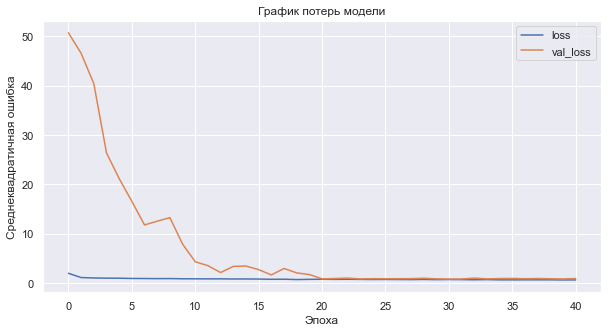

In [47]:
plot_loss(history_mn)

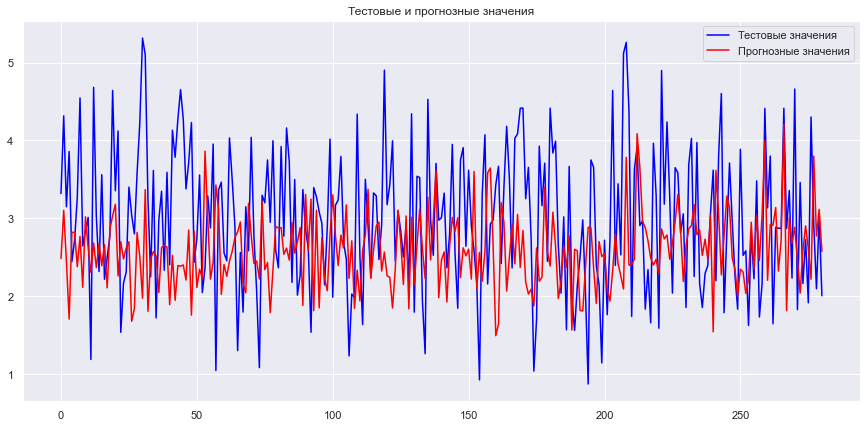

In [48]:
pr_mn = model_mn.predict(np.array((X_test_mn)))
original_mn = y_test_mn.values
predicted_mn = pr_mn

plot_act_pr(original_mn, predicted_mn)

In [54]:
stat_mn = pd.DataFrame()
y_pred_test = model_mn.predict(X_test_mn)
y_pred_train = model_mn.predict(X_train_mn)
stat_mn = pd.concat([stat_mn, metrics_get('Соотношение матрица-наполнитель, тренировочный', y_test_mn, y_pred_test)])
stat_mn = pd.concat([stat_mn, metrics_get('Соотношение матрица-наполнитель, тестовый', y_test_mn, y_pred_test)])
stat_mn

MAE      RMSE        R2  \
Соотношение матрица-наполнитель, тренировочный  0.873024  1.067763 -0.389888   
Соотношение матрица-наполнитель, тестовый       0.873024  1.067763 -0.389888   

                                                max_error  
Соотношение матрица-наполнитель, тренировочный   3.338083  
Соотношение матрица-наполнитель, тестовый        3.338083

#Проверим точность определения модели на вымышленном наборе данных.

In [59]:
a2 = np.array(X_train_mn)

In [60]:
model_mn.predict(a2)

array([[2.845119 ],
       [3.0419273],
       [2.259854 ],
       [1.6390184],
       [2.0419517],
       [4.2473135],
       [2.7282376],
       [1.6825352],
       [2.0289989],
       [2.856462 ],
       [1.8840741],
       [1.7480793],
       [2.4730527],
       [3.3471794],
       [3.5261352],
       [2.2443292],
       [1.7744118],
       [2.817586 ],
       [2.4239256],
       [2.9100323],
       [2.8420663],
       [3.2359943],
       [1.8493209],
       [2.334884 ],
       [3.1591716],
       [3.58986  ],
       [3.0674825],
       [2.0554864],
       [2.5158367],
       [1.8755668],
       [3.0223618],
       [2.8496833],
       [2.576894 ],
       [2.305204 ],
       [1.977902 ],
       [3.21981  ],
       [1.8671566],
       [2.654323 ],
       [2.1387913],
       [3.0609665],
       [2.7977326],
       [2.8351653],
       [2.585201 ],
       [2.757319 ],
       [2.0725975],
       [1.7125002],
       [2.7068558],
       [2.7042763],
       [2.389739 ],
       [3.75532  ],


In [56]:
a1 = np.array(X_test_mn)

In [58]:
model_mn.predict(a1)

array([[2.484454 ],
       [3.1036897],
       [2.4464788],
       [1.7083032],
       [2.8225784],
       [2.8201075],
       [2.3814907],
       [2.769729 ],
       [2.1158307],
       [3.0208359],
       [2.6221254],
       [2.3077152],
       [2.686378 ],
       [2.3691022],
       [2.6741147],
       [2.392745 ],
       [2.6668181],
       [2.1091497],
       [2.8661335],
       [3.0337334],
       [3.1814845],
       [2.2624424],
       [2.7015643],
       [2.4795015],
       [2.6202097],
       [2.700938 ],
       [1.6798601],
       [1.837418 ],
       [2.8210192],
       [2.506464 ],
       [1.9760609],
       [3.3692236],
       [1.8079709],
       [2.484513 ],
       [2.5731056],
       [2.5183926],
       [2.0498576],
       [2.6257267],
       [2.655801 ],
       [2.6324565],
       [1.8931781],
       [2.526363 ],
       [1.949158 ],
       [2.3954952],
       [2.3872058],
       [2.403144 ],
       [2.2099223],
       [2.851152 ],
       [1.7585479],
       [2.835039 ],


In [67]:
#сохраним модель
model_path_mn = 'my_models/model_mn'

In [63]:
model_mn.save(model_path_mn)

INFO:tensorflow:Assets written to: my_models/model_mn\assets


In [64]:
model_mn.save_weights('my_models/model_mn/weights')